In [2]:
cd('../src/');

In [3]:
fhandle = fopen('../Data/Vorgabe.txt','r');

In [4]:
formatSpec = '%f %f %f %d';
sizeA = [4 Inf];

In [5]:
A = fscanf(fhandle,formatSpec,sizeA);

In [6]:
fclose(fhandle);

In [7]:
size(A)


ans =

           4     1252931




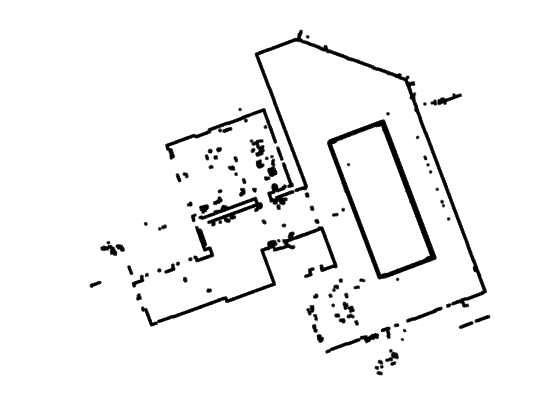

In [8]:
figure('name', 'display scatter');
scatter(A(1, :), A(2, :), '.', 'black');
axis equal
axis off
saveas(gcf, '../Data/Vorgabe.png');

## Load image

In [9]:
imgOrg = imread('../Data/Vorgabe.png');

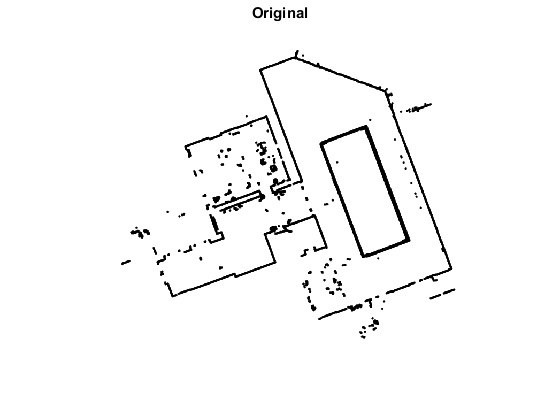

In [10]:
figure('name', 'Original');
imshow(imgOrg);
title('Original');

## Binary image

In [11]:
imgBin = imbinarize(rgb2gray(imgOrg));

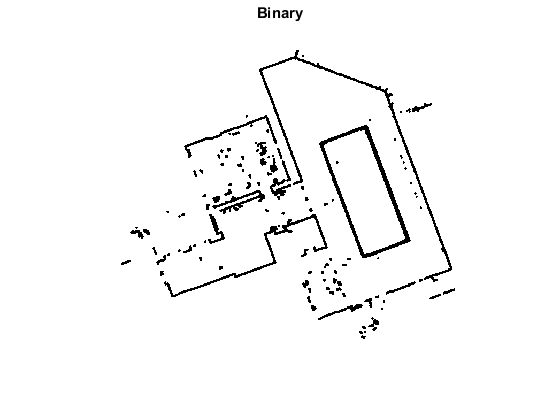

In [12]:
figure('name', 'Binary');
imshow(imgBin);
title('Binary');

## Median filter

In [13]:
imgMed = medfilt2(rgb2gray(imgOrg));
imgMed = medfilt2(imgMed);

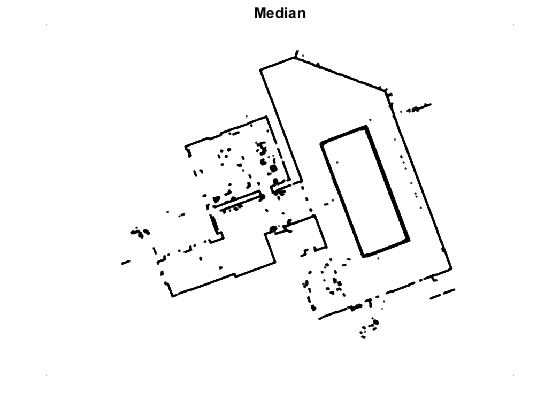

In [14]:
figure('name', 'Median');
imshow(imgMed);
title('Median');

## Canny filter

In [15]:
imgCan = edge(imgBin, 'canny');

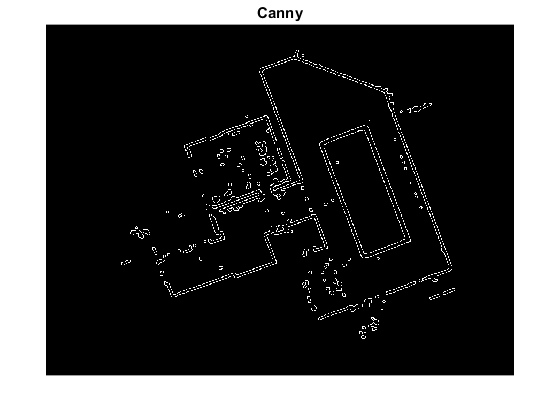

In [16]:
figure('name', 'Canny');
imshow(imgCan);
title('Canny');

## Erode median image

In [17]:
strDia = strel('diamond', 1);
imgEro = imopen(imgBin, strDia);

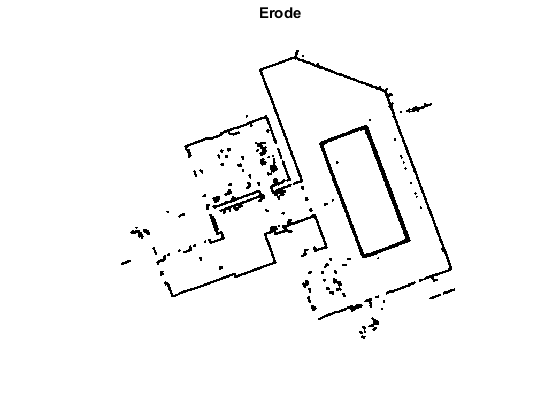

In [18]:
figure('name', 'Erode');
imshow(imgEro);
title('Erode');

In [19]:
m = [
    0, 0, 0;
    0, 1, 0;
    0, 0, 0
];
imgCus = imfilter(imgBin, m);

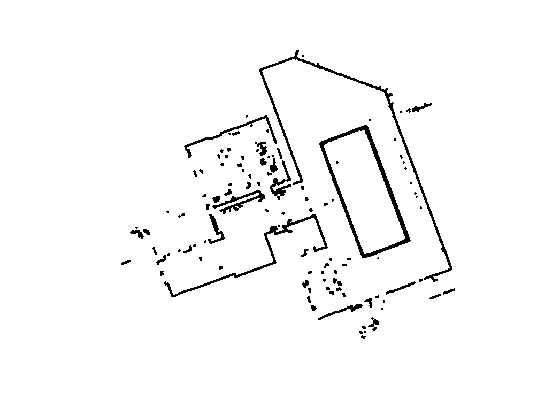

In [20]:
figure();
imshow(imgCus);

In [21]:
[rows, columns] = size(imgBin);
imgNew = ones(rows - 2, columns - 2);

for row = 3 : rows - 2
    for column = 3 : columns - 2
        sumP = sum([
            sum(imgBin(row - 2, (column - 2) : (column + 2))),...
            sum(imgBin(row - 1, (column - 2) : (column + 2))),...
            sum(imgBin(row,     (column - 2) : (column + 2))),...
            sum(imgBin(row + 1, (column - 2) : (column + 2))),...
            sum(imgBin(row + 2, (column - 2) : (column + 2)))
        ]);
        if sumP <= 3
            imgNew(row - 1, column - 1) = 0;
        else
            imgNew(row - 1, column - 1) = 1;
        end
    end
end

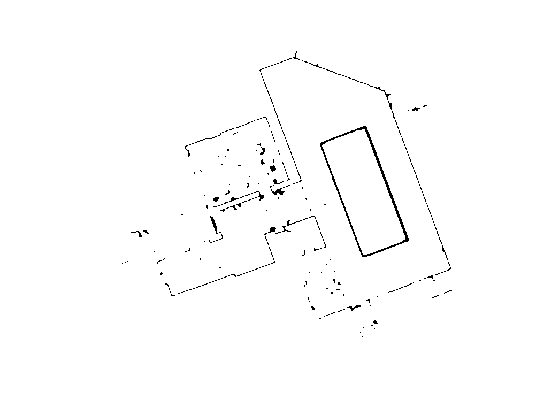

In [22]:
imshow(imgNew);

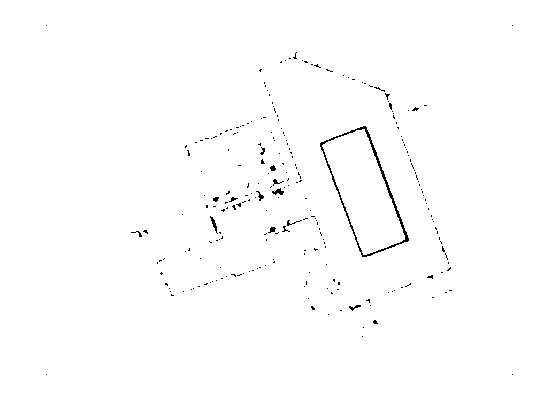

In [23]:
imgCan = edge(imgNew, 'canny');
imshow(medfilt2(imgNew));